In [126]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd

import scienceplots

plt.style.use('science')

In [127]:
def load_F1_scores():
    
    tests = []
    
    for file in os.listdir('../tests'):
        with open('../tests/' + file) as f:
            f1 = pd.read_csv(f)
            
            _, model, img = file.split('_')
            
            f1["model"]=model+' '+img.removesuffix('.csv')
            
            f1.set_index("model", inplace=True)
            
            tests.append(f1)
    
    return pd.concat(tests)

load_F1_scores()

,F1
model,
nano 640,0.693934
medium 640,0.695106
nano 1216,0.751027


In [128]:
def load_all_json_experiments():
    # Load all json files in the experiments directory which name starts with 'experiment'
    experiments = []
    for file in os.listdir('../experiments'):
        if file.startswith('experiment'):
            with open('../experiments/' + file) as f:
                experiments.append(json.load(f))

    experiments = pd.DataFrame(experiments)
    experiments["name"]=experiments.apply(lambda x: x["model"]+" "+str(x["image_size"]), axis=1)
    experiments.drop(columns=["model", "image_size"], inplace=True)
    experiments.set_index("name", inplace=True)
    
    return experiments

experiments=load_all_json_experiments()
experiments

,WER,CER,Time_no_yolo,Time_yolo,Seconds_feed
name,,,,,
nano 640,0.358513,0.303496,188.754934,159.638115,31335.556625
medium 640,0.325889,0.282741,188.754934,188.441415,31491.391250
nano 1216,0.250291,0.209119,188.754934,167.606453,29537.840938


In [129]:
def bar_plot(Series:pd.Series, title:str, xlabel:str, ylabel:str, line_value=None):
    
    values = Series.values
    labels = Series.index
    
    fig=plt.figure(figsize=(4, 5))
    
    # Create a bar graph
    plt.bar(labels, values, width=0.5)
    #plt.xticks(labels, rotation=45, ha="right")

    # Add a title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if line_value:
        # Add a horizontal line
        plt.axhline(y=line_value, color='r', linestyle='--')

    # Show the graph
    fig.tight_layout()
    
    os.makedirs('../plots', exist_ok=True)
    plt.savefig(f'../plots/{title}.png')
    plt.show()

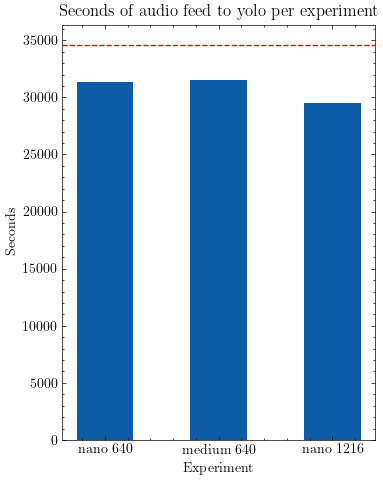

In [130]:
bar_plot(experiments["Seconds_feed"], "Seconds of audio feed to yolo per experiment", "Experiment", "Seconds", 34620)

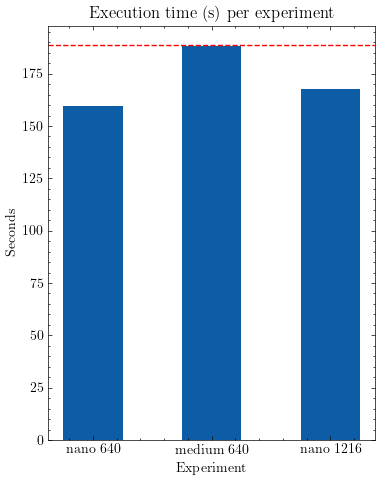

In [131]:
bar_plot(experiments["Time_yolo"], "Execution time (s) per experiment", "Experiment", "Seconds", line_value=experiments["Time_no_yolo"].mean())

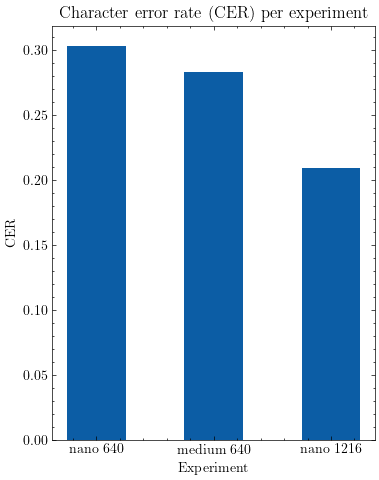

In [132]:
bar_plot(experiments["CER"], "Character error rate (CER) per experiment", "Experiment", "CER")

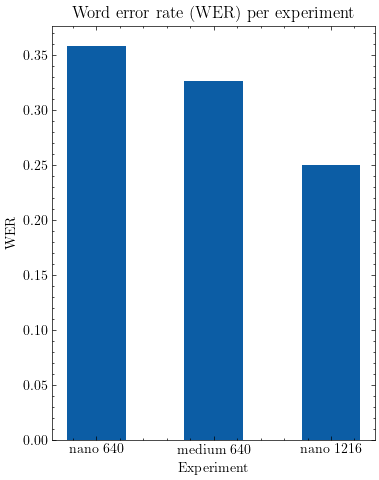

In [133]:
bar_plot(experiments["WER"], "Word error rate (WER) per experiment", "Experiment", "WER")